# **Task HD1** 
## Analyzing YouTube Video Data from News Publishers

##### This task focuses on analyzing YouTube videos about a news topic (e.g., Covid-19) published by at least 4 English news publishers (e.g., BBC, Fox News, ...) from a start date to an end date. You will need to specify the news topic and the list of keywords to search for the videos about that topic on YouTube. Also, you will need to extract the channel IDs of the news publishers using the function get_channel_info() given to you in the attached "collect.ipynb" file. All settings need to be specified in Section B (Settings) of "collect.ipynb" and also copied into Section B (Settings) of this jupyter notebook (HD1.ipynb). Please note the terms "News Publisher" and "Cahnnel" have been used interchangably in this task (each news publisher has a channel - if a news publisher has more than one channels on YouTube, pick any and state that in your TaskCompletionReport). The following instructions convey important information about the task. Please **read them carefully** and complete the task. If you need any clarification please    
<img src="youtube.png" alt="SIT112 Avocado!" width="1800" height="200">

### A. Instructions

#### Attachments
* directions.pdf
* collect.ipynb
* credentials-sample.ini
* video-presentation-guideline.pdf

#### Get Started 
0. Please watch [this video](https://www.youtube.com/watch?v=N9CT6Ggh0oE) about Sentiment Analysis.
1. Rename the "credentials-sample.ini" file to "credentials.ini" and follow the instructions. 
2. Creat your YouTube API key and assign it to developer_key in the credentials.ini file. You will need the YouTube API key to get access to the YouTube API (collect the data). See the following video: https://youtu.be/N18czV5tj5o (the video is not up to date; the instrucitons might be sighly different. You can view the following link for more details: https://developers.google.com/youtube/v3/getting-started). Please note Projects that enable the YouTube Data API have a default quota allocation of 10,000 units per day; to make an efficient use of your quota, please avoid multiple excecutions of the "collect.ipynb" file: https://developers.google.com/youtube/v3/guides/quota_and_compliance_audits. 
3. To work with the YouTube API (send queries), you need to install Google API Python Client using: "conda install google-api-python-client" 
#### Specify the news topic and news publishers (channels)
4. Choose a news topic (e.g., Covid-19) and a list of keywords to be used for finding videos about that topic. You can extract the keywords by looking at some sample video titles. 
5. Choose at least 4 popular English news publishers (e.g., BBC, Fox News).
6. Extract, manually, the video IDs of sample videos from different news publishers (channels). You can do so by clicking on the share button for each video. 
7. Extract the Channel IDs of the videos using the get_channel_info() function in collect.ipynb 
#### Collect the Videos and Comments using "collect.ipynb" 
8. Specify the Channel IDs and names in the Settings section of the attached collect.ipynb file (CHANNELS = {...})
9. Specify the list keywords in the Settings section of the attached collect.ipynb file (KEYWORDS = [...])
10. Specify the START_DATE and END_DATE in the Settings section of the attached collect.ipynb file
11. Specify the MAX_VIDEOS such that you can extract **at least 20 videos per news publisher (channel)**. Make sure for your specified topic, **at least 300 comments per news publisher (channel)** can be collected. Please note some publishers might have disabled comments.
12. Please **do not make any changes to the "collect.ipynb" file**
13. Execute the collect.ipynb file to collect the videos (will be stored in videos.csv) and the comments on those videos (will be stored in comments.csv).
#### Complete the Task
14. <font color='red'> Choose only 1 question from Section E</font>, and answer it based on the hints. Please note, for each question, you must **briefly discuss your observations** based on the results.
15. Please note **there is no unique solution** for most questions; if you need to make any assumptions, **state your assumptions** in the comments and in your TaskCompletionReport and answer the question accordingly. Please also note, **if something has not been clearly stated in a question (e.g., the type of visualization, etc) it means you are allowed to make your own choice**. 
16. **Read the attached "video-presentation-guideline.pdf"** carefully and record a video clip (based on video-presentation-guideline.pdf) that presents your completed task. Upload the video on a video repository such as YouTube (or any other preferred repository) and provide the link in the TaskCompletionReport. 
17. Complete the TaskCompletionReport form.

#### Submit the Task
18. Please make sure you have copied the settings from collect.ipynb into your solution file (HD1.ipynb), under section B (settings).  
19. Please make sure you have executed and saved all the cells in your jupyter notebook without any error; otherwise, your submission may not be flagged as complete. 
20. Please make sure you have included the link to the video rcording of your presentation in your TaskCompletionReport. 
21. Submit (1) the TaskCompletionReport as a "PDF" file and (2) your solution file (HD1.ipynb) as an "ipynb" file (do not zip/combine them). Please do not include "collect.ipynb" in your submission. 

#### <font color ='red'>Attend the Interview </font>
22. Please attend your interview - on week 11 - during the workshop you are enrolled in. 
23. Please make sure you have submitted your task via OnTrack before the interview; you can still resubmit by the end of Week 12 if any changes are needed. 
24. During the interview, you will be asked questions about your submission and might be directed to make changes to your code and explain their impacts on the results/observations. 

Good luck :)

### B. Settings
Copy your settings from Section B of the "collect.ipynb" file below (as Python comments).

In [154]:
VIDEOS_FILE = "videos.csv"
COMMENTS_FILE = "comments.csv"
CREDENTIALS_FILE = 'credentials.ini'
START_DATE = datetime(2020, 1, 1)
END_DATE = datetime(2024, 1, 1)
KEYWORDS =['coronavirus', 'covid', 'covid-19', 'pandemic']
# You can use functin get_channel_info() to extract the channel ID of a sample video from a news publisher ...
CHANNELS = {
    'UCXIJgqnII2ZOINSWNOGFThA' : 'Fox News',
    'UC16niRr50-MSBwiO3YDb3RA' : 'BBC News',
    'UCupvZG-5ko_eiXAupbDfxWw' : 'CNN',
    'UCaXkIU1QidjPwiAYu6GcHjg' : 'MSNBC',
    'UCeY0bbntWzzVIaj2z3QigXg' : 'NBC News'
}
MAX_VIDEOS = 50 # the maximum number of video that should be returned for each request. Acceptable values are 0 to 50
QUERY= f"intitle:{','.join(KEYWORDS)}"

### C. Imports
You need to import the following libraries. Install the libraries using "conda install ... or pip install ..." if they have not been installed on your machine. For example you can install google api python client by executing "conda install google-api-python-client"

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from datetime import datetime
import os
from configparser import ConfigParser
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from langdetect import detect
import langdetect
from textblob import TextBlob
import calendar
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from prettytable import PrettyTable
from tabulate import tabulate
import numpy as np
from collections import defaultdict
import warnings
import statsmodels.formula.api as smf
from nltk.stem import WordNetLemmatizer
# Ignore the warning
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thinh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### D. Clean and Prepare the Data

##### D.1. Write Python code that cleans the data for analyzing the videos and comments.

In [134]:
# a basic data cleaning has been performed on the collected data by the clean_data()function in collect.ipynb
# additionl data cleaning can be added here - if needed  

##### D.2. Write Python code that prepares the data for analyzing the videos and comments.

In [155]:
# A sample code for data preparation has been given below. Feel free to edit when needed

# Load the videos and comments dataframes from their respective CSV files
videos_df = pd.read_csv('videos.csv')
comments_df = pd.read_csv('comments.csv')

# Function to extract duration components (PT[number]M[number]S)
def extract_duration_components(duration):
    pattern = r'PT(?:(\d+)M)?(?:(\d+)S)?'
    match = re.search(pattern, duration)
    
    if match:
        minutes = match.group(1) if match.group(1) else '0'
        seconds = match.group(2) if match.group(2) else '0'
        return [minutes, seconds]
    else:
        return ['0', '0']
    
# Convert the published_at column to a datetime object for videos_df
videos_df['published_at'] = pd.to_datetime(videos_df['published_at'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a new column that contains the published_at weekly
videos_df['published_at_week'] = videos_df['published_at'].dt.strftime('%Y-%m-%W')

# Create a new column that contains the published_at monthly
videos_df['published_at_month'] = videos_df['published_at'].dt.strftime('%Y-%m')

# Create a new column that contains the published_at monthly
videos_df['published_at_year'] = videos_df['published_at'].dt.strftime('%Y')

# Convert the published_at column to a datetime object for comments_df
comments_df['comment_date'] = pd.to_datetime(comments_df['comment_date'], format='%Y-%m-%dT%H:%M:%SZ')

# Create a new column that contains the published_at weekly
comments_df['comment_date_week'] = comments_df['comment_date'].dt.strftime('%Y-%m-%W')

# Create a new column that contains the published_at monthly
comments_df['comment_date_month'] = comments_df['comment_date'].dt.strftime('%Y-%m')

# Create a new column that contains the published_at monthly
comments_df['comment_date_year'] = comments_df['comment_date'].dt.strftime('%Y')

# Convert the duration column to seconds for videos_df
videos_df['duration'] = videos_df['duration'].apply(extract_duration_components)
videos_df['duration'] = videos_df['duration'].apply(lambda x: int(x[0]) * 60 + int(x[1]) )

# Prepared DataFrame objects; can be used for data analysis
videos = videos_df
comments = comments_df
print("Videos Dataframe :")
display(videos)
print("Comments Dataframe:")
display(comments)
videos_comments = pd.merge(videos,comments, on='video_id', how = 'inner') # merged videos and comments

Videos Dataframe :


,video_id,channel_id,video_title,channel_title,category_name,live_upcoming_none,view_count,like_count,dislike_count,comment_count,published_at,tags,duration,definition,caption,thumbnail,url,published_at_week,published_at_month,published_at_year
0,d1eEWihvwpQ,UCXIJgqnII2ZOINSWNOGFThA,who declares coronavirus outbreak a pandemic,Fox News,News & Politics,none,457004,3624,0,1940,2020-03-11 16:50:56,"fox news alert,breaking news,fox,news,fox news...",51,hd,True,https://i.ytimg.com/vi/d1eEWihvwpQ/default.jpg,https://www.youtube.com/watch?v=d1eEWihvwpQ,2020-03-10,2020-03,2020
1,lydWQoqDNp8,UCXIJgqnII2ZOINSWNOGFThA,tucker coronavirus pandemic is a real fear,Fox News,News & Politics,none,459432,9069,0,2273,2020-02-25 02:20:00,"health,coronavirus,china,wuhan china,novel cor...",168,hd,True,https://i.ytimg.com/vi/lydWQoqDNp8/default.jpg,https://www.youtube.com/watch?v=lydWQoqDNp8,2020-02-08,2020-02,2020
2,2j3YtPVBT30,UCXIJgqnII2ZOINSWNOGFThA,ny gov cuomo talks rent payments coronavirus c...,Fox News,News & Politics,none,84915,539,0,543,2020-03-30 18:00:34,"Fox News Channel,FNC,Fox News,News,Latest News...",2274,hd,False,https://i.ytimg.com/vi/2j3YtPVBT30/default.jpg,https://www.youtube.com/watch?v=2j3YtPVBT30,2020-03-13,2020-03,2020
3,jXHikITwlng,UCXIJgqnII2ZOINSWNOGFThA,bill gates on his virus warning efforts to fi...,Fox News,News & Politics,none,887721,8216,0,12378,2020-04-05 18:50:02,"Fox News Channel,Fox News,News,fox news sunday...",749,hd,True,https://i.ytimg.com/vi/jXHikITwlng/default.jpg,https://www.youtube.com/watch?v=jXHikITwlng,2020-04-13,2020-04,2020
4,gkR0jipzPRA,UCXIJgqnII2ZOINSWNOGFThA,how to prevent the spread of coronavirus,Fox News,News & Politics,none,29347,489,0,259,2020-03-18 19:15:01,"Fox News Channel,FNC,Fox News,News,Latest News...",31,hd,False,https://i.ytimg.com/vi/gkR0jipzPRA/default.jpg,https://www.youtube.com/watch?v=gkR0jipzPRA,2020-03-11,2020-03,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,St9BwhXVBTc,UCeY0bbntWzzVIaj2z3QigXg,live new jersey governor phil murphy holds cor...,NBC News,News & Politics,none,127046,387,0,116,2020-05-06 18:17:50,"nbc news,nbc,news,breaking news,us news,world ...",0,hd,False,https://i.ytimg.com/vi/St9BwhXVBTc/default.jpg,https://www.youtube.com/watch?v=St9BwhXVBTc,2020-05-18,2020-05,2020
246,0CQO8BML1EU,UCeY0bbntWzzVIaj2z3QigXg,world health organization says coronavirus spr...,NBC News,News & Politics,none,463877,1374,0,2513,2020-08-18 22:14:57,"nbc news,news channel,breaking news,us news,wo...",723,hd,False,https://i.ytimg.com/vi/0CQO8BML1EU/default.jpg,https://www.youtube.com/watch?v=0CQO8BML1EU,2020-08-33,2020-08,2020
247,HSVqpWkoK30,UCeY0bbntWzzVIaj2z3QigXg,boosting your immune system against coronaviru...,NBC News,News & Politics,none,819454,6088,0,1267,2020-03-12 02:01:00,"NBC News NOW,More From Stream,Coronavirus,nbc ...",856,hd,False,https://i.ytimg.com/vi/HSVqpWkoK30/default.jpg,https://www.youtube.com/watch?v=HSVqpWkoK30,2020-03-10,2020-03,2020
248,LNmLeb5_1YM,UCeY0bbntWzzVIaj2z3QigXg,how restaurants are changing because of the co...,NBC News,News & Politics,none,284348,1107,0,539,2020-05-17 23:46:46,"Nightly News,Business,U.S. News,Coronavirus,NB...",145,hd,True,https://i.ytimg.com/vi/LNmLeb5_1YM/default.jpg,https://www.youtube.com/watch?v=LNmLeb5_1YM,2020-05-19,2020-05,2020


Comments Dataframe:


,video_id,comment_id,comment_text,comment_author,comment_date,comment_like_count,parent_comment_id,comment_date_week,comment_date_month,comment_date_year
0,d1eEWihvwpQ,UgxmZNK1ZIj5jMBUemZ4AaABAg,permanently messed sense time,@radioactivebeverage,2024-03-15 01:47:38,2,NaN,2024-03-11,2024-03,2024
1,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg,covid august super unpleasant got vaccines boo...,@rosieasmrwhispererzephier7021,2022-10-11 02:46:38,0,NaN,2022-10-41,2022-10,2022
2,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg.9h1A5EF38D69wxn0x1JQlS,showlinemuch better also influenza december la...,@rosieasmrwhispererzephier7021,2023-11-11 02:21:41,0,UgxbTG_0cWGvMAee0sx4AaABAg,2023-11-45,2023-11,2023
3,d1eEWihvwpQ,UgzBGHRwVHq4rkAa4AZ4AaABAg,happened march videos made,@danhobson24,2022-06-08 21:53:44,0,NaN,2022-06-23,2022-06,2022
4,d1eEWihvwpQ,Ugy03Fu2_XAUTUUsHtB4AaABAg,year,@monsehere8090,2021-03-14 15:29:55,2,NaN,2021-03-10,2021-03,2021
...,...,...,...,...,...,...,...,...,...,...
5533,OTHTJ8lo0VQ,UgyOCGMq16DnVI1R_hB4AaABAg,family confirm government stimulus choice work,@Chandroization,2020-05-31 18:05:09,0,NaN,2020-05-21,2020-05,2020
5534,OTHTJ8lo0VQ,UgyFpspQscuZPNFFSn54AaABAg,hopefully mexicans solve population problem so...,@legendhasitstudio,2020-05-31 07:53:39,0,NaN,2020-05-21,2020-05,2020
5535,OTHTJ8lo0VQ,UgwaP4_ovI9v03Prc8l4AaABAg,amlo ignorant incompetent irresponsible inept ...,@tlatoaninezahualcoyotl6855,2020-05-30 17:56:32,2,NaN,2020-05-21,2020-05,2020
5536,OTHTJ8lo0VQ,UgzgudEQADNO-suzWz54AaABAg,covid global conspiracy made radical siionists...,@tlatoaninezahualcoyotl6855,2020-05-30 17:54:49,1,NaN,2020-05-21,2020-05,2020


##### D.3. Write Python code that takes a text input and returns its sentiment (polarity) score and sentiment category (positive, negative, neutral)

In [156]:
# This function takes a text input and returns its sentiment (polarity) score
# If the text is null, it returns 0
def get_sentiment_score(text):
    if pd.isnull(text):
        return 0
    else:
        return TextBlob(text).sentiment.polarity
    
# This function takes a text input and returns its sentiment category
# If the text is null, it returns 'neutral'
# If the polarity score is greater than 0, it returns 'positive'
# If the polarity score is less than 0, it returns 'negative'
# Otherwise, it returns 'neutral'
def get_sentiment(text):
    if pd.isnull(text):
        return 'neutral'
    else:
        blob = TextBlob(text)
        if blob.sentiment.polarity > 0:
            return 'positive'
        elif blob.sentiment.polarity < 0:
            return 'negative'
        else:
            return 'neutral'

### E. Analyze the Videos and Comments
* Please make sure you have watched [this video](https://www.youtube.com/watch?v=N9CT6Ggh0oE) and understood the concept of Sentiment Analysis.
* Choose <font color ='red'>(only) 1 </font> of the following questions and write Python code to answer it. 
* Please note you must (briefly) discuss your observations. 
* Use function get_sentiment_score() to identify the sentiment (polarity) score of the video titles or comments.
* Use function get_sentiment() to identify the sentiment categories (positive, negative, neutral) of the video titles or comments.
* Please note the comments are provided to partially guide you; you are not required to strictly follow them. 


##### E.1. What is the monthly distribution of the positive, negative, and neutral sentiments in the video titles and comments from Jan 2020 to Jan 2021? Use visualization to answer this question for different news publishers (channels) and discuss your observations. 

In [137]:
# load the data

# extract year and month from published_at and comment_date columns

# apply the get_sentiment function to the video titles to get the sentiment

# apply the get_sentiment function to the comments to get the sentiment

# define start and end date for data analysis

# ...


##### E.2. Use regression analysis with visualization to test the following hypothesises:

* H1: There is a meaningful relationship between the sentiment of a video title and the sentiments of its corresponding comments.  
* H2: There is a meaningful relationship between the video likes and the sentiments of its corresponding comments.
* H3: There is a meaningful relationship between the duration of a video and the sentiments of its corresponding comments.

In [157]:
# Import neccessary packages to analyse the sentiments and the polarity scores of the text
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [158]:
# Initialize a pre-trained sentiment analysis model called "cardiffnlp/twitter-roberta-base-sentiment" 
# using the Hugging Face Transformers library
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [159]:
# Function to get the sentiment score of the text
# Basically this function will return the proportion of the negative , neutral and positive part
# And their values will sum up to 1 
def polarity_scores_roberta(text):
    if isinstance(text, str):
        encoded_text = tokenizer(text, return_tensors='pt',max_length = 512)
        output = model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        # So I will return the positive score of the text
        # As the score is more less the negative it indicates
        return scores[2] 
    # If the text is nan return it as neutral 
    else: 
        return 0.5

In [160]:
# Calculate the comment sentiment scores of the comment text
cmt_df = comments
cmt_df["cmt_senscore"] = cmt_df["comment_text"].apply(polarity_scores_roberta)
display(cmt_df.head())

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


,video_id,comment_id,comment_text,comment_author,comment_date,comment_like_count,parent_comment_id,comment_date_week,comment_date_month,comment_date_year,cmt_senscore
0,d1eEWihvwpQ,UgxmZNK1ZIj5jMBUemZ4AaABAg,permanently messed sense time,@radioactivebeverage,2024-03-15 01:47:38,2,NaN,2024-03-11,2024-03,2024,0.013631
1,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg,covid august super unpleasant got vaccines boo...,@rosieasmrwhispererzephier7021,2022-10-11 02:46:38,0,NaN,2022-10-41,2022-10,2022,0.010305
2,d1eEWihvwpQ,UgxbTG_0cWGvMAee0sx4AaABAg.9h1A5EF38D69wxn0x1JQlS,showlinemuch better also influenza december la...,@rosieasmrwhispererzephier7021,2023-11-11 02:21:41,0,UgxbTG_0cWGvMAee0sx4AaABAg,2023-11-45,2023-11,2023,0.718836
3,d1eEWihvwpQ,UgzBGHRwVHq4rkAa4AZ4AaABAg,happened march videos made,@danhobson24,2022-06-08 21:53:44,0,NaN,2022-06-23,2022-06,2022,0.051869
4,d1eEWihvwpQ,Ugy03Fu2_XAUTUUsHtB4AaABAg,year,@monsehere8090,2021-03-14 15:29:55,2,NaN,2021-03-10,2021-03,2021,0.236997


In [161]:
# Calculate the average sentiment score of the comments in each video 
cmt_df = cmt_df.groupby("video_id")[["cmt_senscore"]].mean().reset_index()
display(cmt_df)

,video_id,cmt_senscore
0,-2h2bQYO-0E,0.281077
1,-r6mUnerPtc,0.209749
2,-r_C-QsWEak,0.055507
3,-szt0u2X0WI,0.038593
4,-uc_ZdJ-kAo,0.117554
...,...,...
240,yLyDCMjdbVQ,0.097151
241,yMTTZiY1ppg,0.041414
242,ypr8fHA7lPU,0.325535
243,yvW6juGxZQE,0.124453


In [162]:
# Calculate the sentiment score of the video title 
vd_df = videos
vd_df["video_senscore"] = vd_df["video_title"].apply(polarity_scores_roberta)
display(vd_df.head())

,video_id,channel_id,video_title,channel_title,category_name,live_upcoming_none,view_count,like_count,dislike_count,comment_count,...,tags,duration,definition,caption,thumbnail,url,published_at_week,published_at_month,published_at_year,video_senscore
0,d1eEWihvwpQ,UCXIJgqnII2ZOINSWNOGFThA,who declares coronavirus outbreak a pandemic,Fox News,News & Politics,none,457004,3624,0,1940,...,"fox news alert,breaking news,fox,news,fox news...",51,hd,True,https://i.ytimg.com/vi/d1eEWihvwpQ/default.jpg,https://www.youtube.com/watch?v=d1eEWihvwpQ,2020-03-10,2020-03,2020,0.013502
1,lydWQoqDNp8,UCXIJgqnII2ZOINSWNOGFThA,tucker coronavirus pandemic is a real fear,Fox News,News & Politics,none,459432,9069,0,2273,...,"health,coronavirus,china,wuhan china,novel cor...",168,hd,True,https://i.ytimg.com/vi/lydWQoqDNp8/default.jpg,https://www.youtube.com/watch?v=lydWQoqDNp8,2020-02-08,2020-02,2020,0.007227
2,2j3YtPVBT30,UCXIJgqnII2ZOINSWNOGFThA,ny gov cuomo talks rent payments coronavirus c...,Fox News,News & Politics,none,84915,539,0,543,...,"Fox News Channel,FNC,Fox News,News,Latest News...",2274,hd,False,https://i.ytimg.com/vi/2j3YtPVBT30/default.jpg,https://www.youtube.com/watch?v=2j3YtPVBT30,2020-03-13,2020-03,2020,0.022553
3,jXHikITwlng,UCXIJgqnII2ZOINSWNOGFThA,bill gates on his virus warning efforts to fi...,Fox News,News & Politics,none,887721,8216,0,12378,...,"Fox News Channel,Fox News,News,fox news sunday...",749,hd,True,https://i.ytimg.com/vi/jXHikITwlng/default.jpg,https://www.youtube.com/watch?v=jXHikITwlng,2020-04-13,2020-04,2020,0.045198
4,gkR0jipzPRA,UCXIJgqnII2ZOINSWNOGFThA,how to prevent the spread of coronavirus,Fox News,News & Politics,none,29347,489,0,259,...,"Fox News Channel,FNC,Fox News,News,Latest News...",31,hd,False,https://i.ytimg.com/vi/gkR0jipzPRA/default.jpg,https://www.youtube.com/watch?v=gkR0jipzPRA,2020-03-11,2020-03,2020,0.022811


In [164]:
# Create a new dataframe which contains the comment sentiment score and the video sentiment score
df = vd_df.merge(cmt_df , on = "video_id", how = "left")

# Keep suitable columns for the analysis
df = df[["cmt_senscore","video_senscore","duration","like_count"]]
display(df.head())

,cmt_senscore,video_senscore,duration,like_count
0,0.149066,0.013502,51,3624
1,0.091328,0.007227,168,9069
2,0.080097,0.022553,2274,539
3,0.261362,0.045198,749,8216
4,0.129380,0.022811,31,489


In [165]:
# Lets have a look at the EDA of the newly dataframe
print("Information about the newly created Dataframe:")
display(df.describe())
print("="* 20)
print("Check null values:")
display(df.info())

Information about the newly created Dataframe:


,cmt_senscore,video_senscore,duration,like_count
count,245.000000,250.000000,250.000000,250.00000
mean,0.135250,0.059295,373.956000,3994.08800
std,0.069853,0.106500,422.682201,9094.73641
min,0.021810,0.002841,0.000000,54.00000
25%,0.086929,0.020291,159.500000,629.50000
50%,0.128397,0.030808,282.000000,1607.00000
75%,0.165408,0.049562,451.750000,3476.75000
max,0.506554,0.859094,3330.000000,107607.00000


Check null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cmt_senscore    245 non-null    float64
 1   video_senscore  250 non-null    float32
 2   duration        250 non-null    int64  
 3   like_count      250 non-null    int64  
dtypes: float32(1), float64(1), int64(2)
memory usage: 7.0 KB


None

##### In the 'cmt_senscore' column of our dataframe, we observe five null values, indicating that certain comments don't have any comments to return the sentiment scores at all. To address this, we'll replace these null values with 0.5, signifying a 'neutral' sentiment.

In [166]:
# Replace null values
df["cmt_senscore"].fillna(0.5,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cmt_senscore    250 non-null    float64
 1   video_senscore  250 non-null    float32
 2   duration        250 non-null    int64  
 3   like_count      250 non-null    int64  
dtypes: float32(1), float64(1), int64(2)
memory usage: 7.0 KB


##### Since the "duration" and "like_count" variables have significantly larger ranges of values compared to the target variable "cmt_senscore", so we need to standardize these variables.

In [167]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the dataframe
scaler.fit(df)

# Transform  the dataframe using the scaler
df_standard = scaler.transform(df)
df_standard = pd.DataFrame(df_standard, columns = df.columns)
print("Standardised Dataframe:")
display(df_standard)

Standardised Dataframe:


,cmt_senscore,video_senscore,duration,like_count
0,0.075959,-0.430837,-0.765596,-0.040774
1,-0.596598,-0.489877,-0.488237,0.559125
2,-0.727427,-0.345683,4.504225,-0.380662
3,1.384025,-0.132624,0.889075,0.465146
4,-0.153360,-0.343257,-0.813008,-0.386171
...,...,...,...,...
245,-0.124613,-0.212607,-0.886496,-0.397408
246,0.243683,-0.304164,0.827440,-0.288666
247,4.240117,3.421917,1.142728,0.230695
248,-0.116756,-0.223610,-0.542761,-0.318083


##### Check the distribution of the attributes as well as the relationship between them.

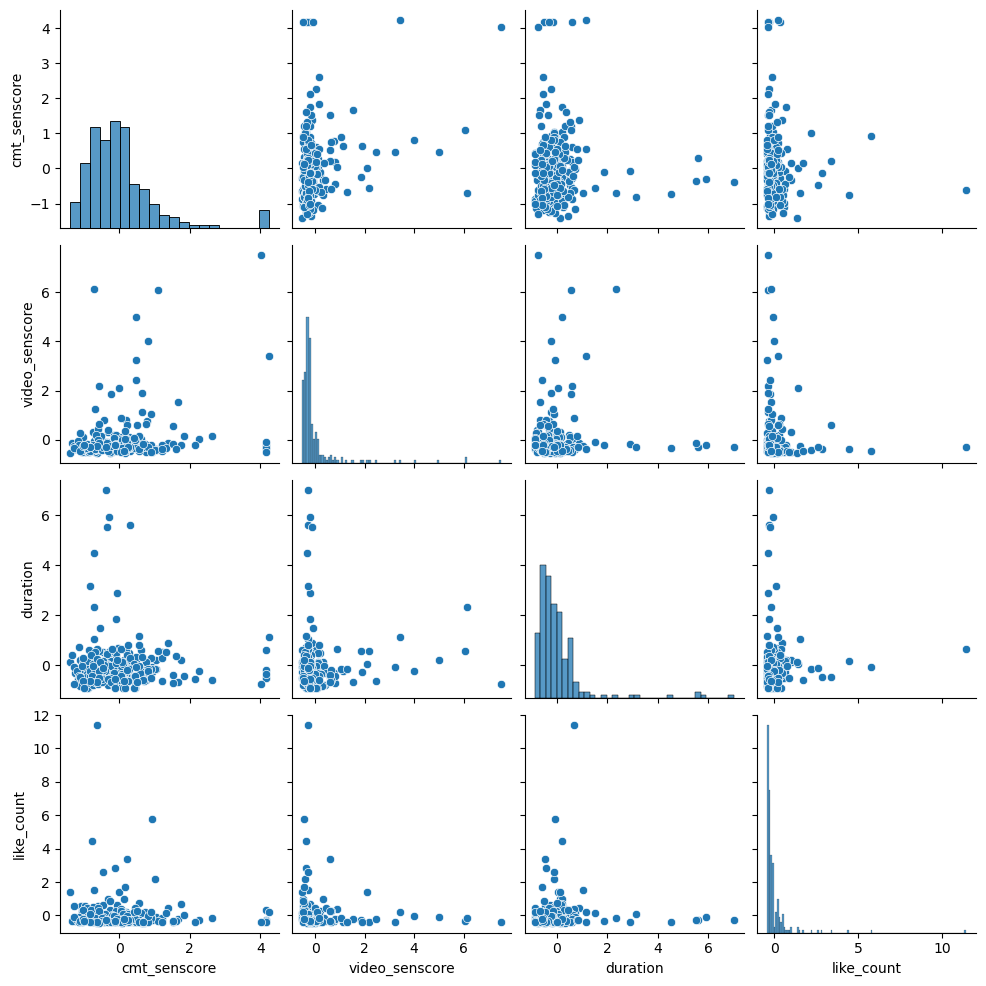

In [168]:
sns.pairplot(df_standard)

##### Let's check the coefficient correlation between variables.

<Axes: >

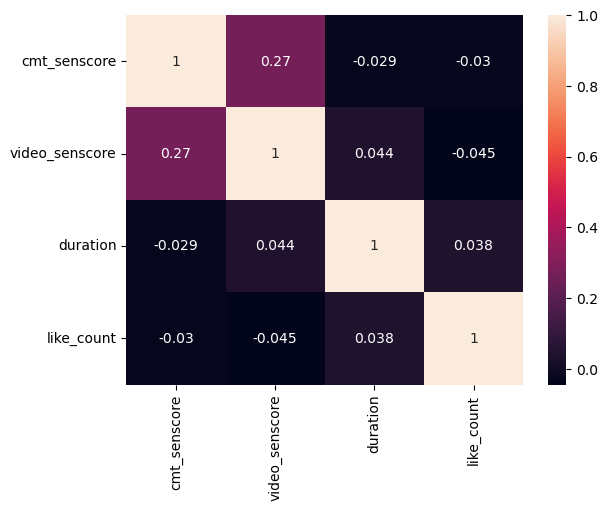

In [169]:
sns.heatmap(df_standard.corr(),annot = True)

##### After creating a pairplot to examine variable distributions and scatterplots to assess relationships, we can confidently assert that there exists a modest correlation between the sentiment score of video titles and the sentiment score of comments. Conversely, there is no discernible correlation between comment sentiment scores and either video duration or like counts. This observation is supported by heatmap analysis, which calculates correlation coefficients between variables.

##### Now Let's plot regression lines of the target variable ("cmt_senscore") and its predictors.

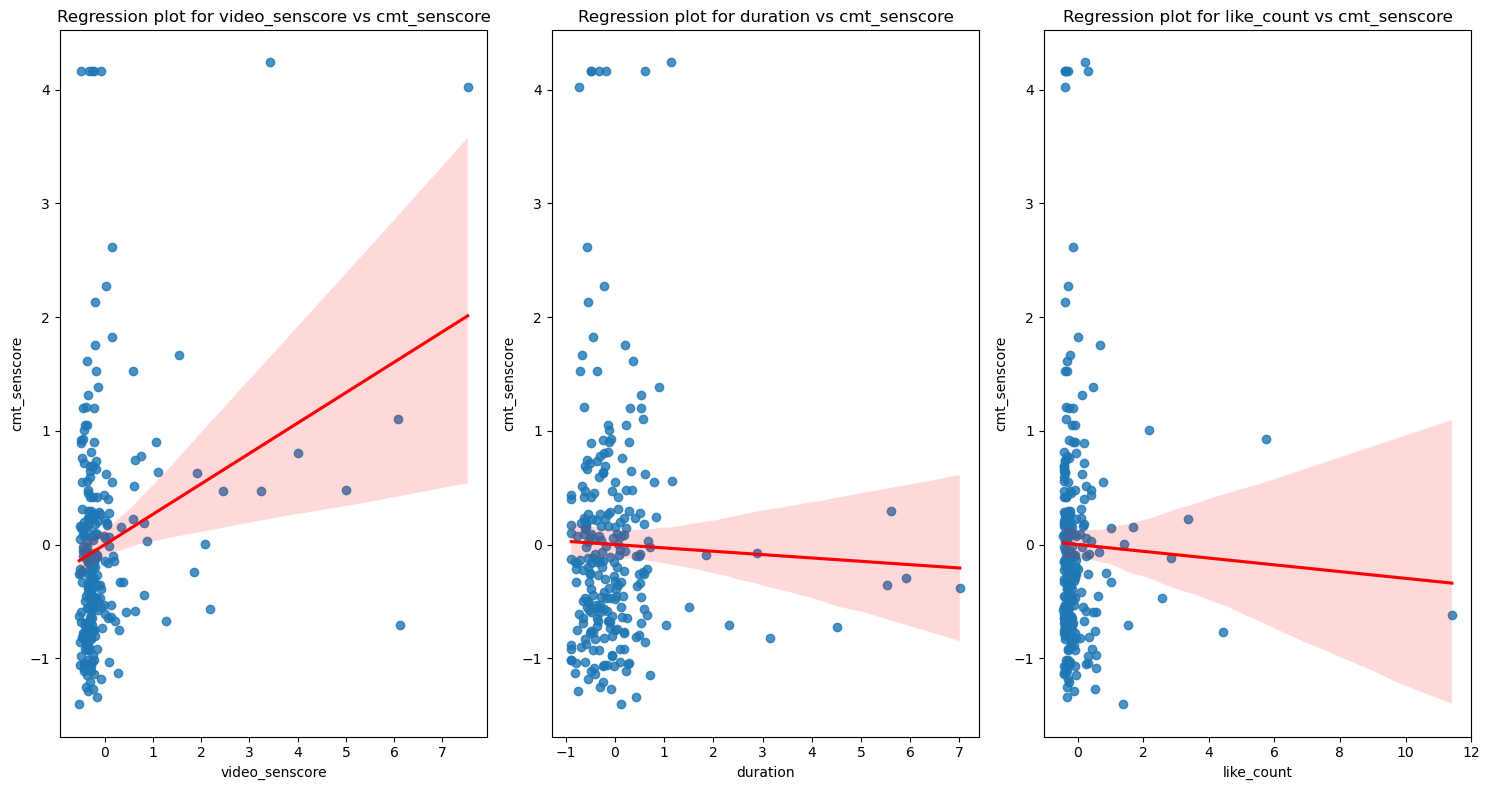

In [170]:
# Get the list of predictor column names
predictor_columns = ["video_senscore","duration","like_count"]

# Create subplots for each predictor
fig, axes = plt.subplots(nrows=1, ncols=len(predictor_columns), figsize=(15, 8))

# Plot regplot for each predictor against the target variable
for i, predictor in enumerate(predictor_columns):
    sns.regplot(x=predictor, y="cmt_senscore", data=df_standard, ax=axes[i],line_kws={"color":"red"})
    axes[i].set_title(f'Regression plot for {predictor} vs cmt_senscore')

# Adjust layout
plt.tight_layout()

##### The regression line plots for the sentiment score of comments with its predictors reveal noticeably wide confidence intervals. This indicates considerable uncertainty regarding the precise position of the true line, suggesting ambiguity about its accuracy. Such wide intervals often stem from highly dispersed data, implying significant randomness and reducing confidence in the model's accuracy if we build a regression model.

##### The next step is running an Ordinary Least Squares (OLS) regression model helps us understand the linear relationship between predictor variables and the target variable ("cmt_senscore"). 

In [171]:
# The X predictors will include all the columns except for the target variable
X_with_const = sm.add_constant(df_standard.drop(columns = "cmt_senscore"))
Y = df_standard[["cmt_senscore"]]
model = sm.OLS(Y, X_with_const).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           cmt_senscore   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     6.497
Date:                Fri, 17 May 2024   Prob (F-statistic):           0.000301
Time:                        14:24:19   Log-Likelihood:                -345.20
No. Observations:                 250   AIC:                             698.4
Df Residuals:                     246   BIC:                             712.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8.674e-17      0.061  -1.41e

##### The initial step in assessing an OLS model is to examine the p-value of the F-statistic, denoted as "Prob (F-statistic)." In this case, the F-statistic is 6.497, with a notably low p-value of 0.000301. This indicates strong statistical significance for the regression model. This means that at least one of the predictor variables has a significant effect on the target variable.

##### Individual Predictor Significane : The coefficient for "video_senscore" is statistically significant with a p-value of 0.000, suggesting that changes in the "video_senscore" have a significant effect on the target variable. On the other hand, for the  "duration" and "like_count" are not statistically significant, as their p-values are much larger than the typical threshold of 0.05, 0.508 and 0.794, repectively.

##### The Omnibus test result with a skewness value of 123.427 indicates a substantial departure of the residuals' distribution from normality. Furthermore, the very low p-value (0.000) strongly rejects the assumption that the residuals follow a normal distribution. Essentially, the model's residuals exhibit significant non-normality, violating a fundamental assumption of linear regression.

##### With a JB statistic of 574.679, there's a notable deviation from the normal distribution assumption. The extremely low p-value (1.62e-125) provides substantial evidence against the null hypothesis of normality. This aligns with the Omnibus test findings, affirming that the residuals lack normal distribution.

##### Based on the OLS summary, it seems that while there may be a modest relationship between the predictor (sentiment score of video titles) and the target variable (sentiment score of comments), this predictor alone does not suffice for constructing a regression model.


##### Let's examine the distribution of residuals by creating residual plots and Q-Q plots. This will help us evaluate the adequacy of our regression model's assumptions.

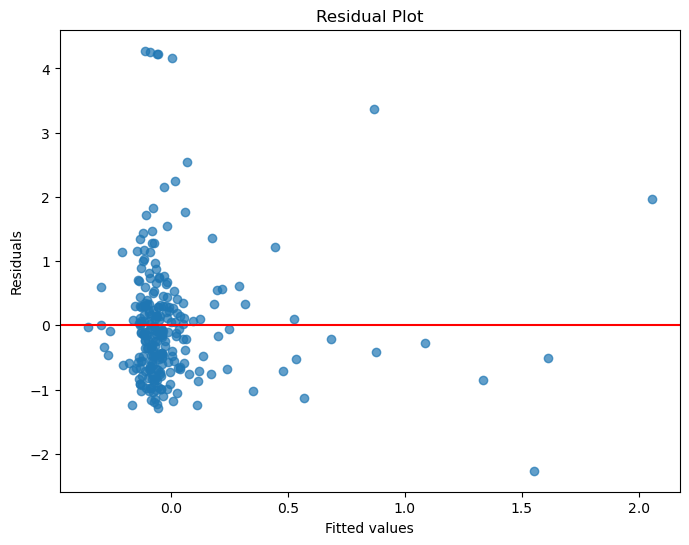

<Figure size 800x600 with 0 Axes>

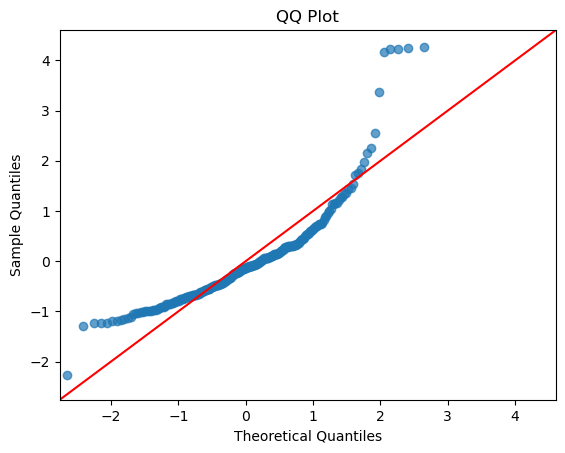

In [172]:
# Residuals
residuals = model.resid
predicted_values = model.fittedvalues

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.7)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# QQ plot
QQ = ProbPlot(residuals)
plt.figure(figsize=(8, 6))
QQ.qqplot(line='45', alpha=0.7, color='b', lw=2)
plt.title("QQ Plot")
plt.show()

##### From our analysis of the residual plot, it's evident that the actual data points tend to cluster vertically, contrary to the expected spread along the horizontal axis. Addmiitionally, when exaning the distribution of residuals by using the QQ plot, ideally, the points should align closely with the red line, indicating adherence to a normal distribution. However, instead of conforming to the line, the points exhibit a curved pattern.
##### This indicates a violation of the assumption regarding the distribution of residuals, which is typically assumed to be normally distributed.

##### E.3. Check if the following hypothesis is true: Video titles that contain certain words are more likely to elicit certain sentiments in the comments. Use visualization and discuss your observations. Use function get_sentiment_score().

Approach: Use natural language processing (NLP) techniques to clean the video titles and count the occurrence of words in them. Group the video titles by their associated sentiment categories (positive, negative, neautral) and filter out words that are frequent across all sentiment categories. You can visualize the relationship between sentiment and word prevalence by creating word clouds for each sentiment category.


In [ ]:
# This question is slightly more challenging than E.1 and E.2 (please note you are required to asnwer only one of the questions)

